# EDA_Geotab Intersection Congestion 

In [1]:
__author__ = "Zhiji Ding"
__copyright__ = "Copyright 2018, Zhiji Ding"
__email__ = "jimmydzj2006@gmail.com"

In [2]:
# Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

## Load data

In [3]:
train_df = pd.read_csv('/Users/jimmyding/GEOTAB_intersection_congestion/dataset/bigquery-geotab-intersection-congestion/train.csv')
test_df = pd.read_csv('/Users/jimmyding/GEOTAB_intersection_congestion/dataset/bigquery-geotab-intersection-congestion/test.csv')

In [4]:
train_df.head(5)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1920335,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1920336,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1920337,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1920338,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1920339,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [5]:
train_df.isna().sum(axis=0)

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

## Pre-processing
### 1.Street feature
- What doesn't matter: street names
- What matters: type of street
- Let's ignore the street names and extract the street type first.

In [6]:
train_df[['IntersectionId','City']].groupby(['City']).nunique()

,IntersectionId,City
City,,
Atlanta,377,1
Boston,973,1
Chicago,2129,1
Philadelphia,1317,1


In [7]:
street_type=['Road','Street','Avenue','Drive','Boulevard','Lane','Garden',\
             'Parkway','Way','St','Highway','Place','Pkwy','Oval','Terrace','Square',\
            'Circle','Ml','Ave','Bridge','Mall','Bld','Broadway','Expressway','Park',\
            'Court','Overpass','Row','way','Wharf','Charlesgate','Prado',\
            'Fontainebleau','Fairmount','Connector','Corridor','Market']


In [8]:
def road_encode(x):
    """
    This is to ensure that no undefined street type remain in the dataset.
    Search continues until no "not_found" exists anymore.
    """
    
    if pd.isna(x):
        return 'unknown'
    else:
        for road in street_type:
            if road in x:
                return road
            else:
                pass
        return 'not_found'
    

In [9]:
train_df['EntryStreetName']=train_df['EntryStreetName'].apply(road_encode)
train_df['ExitStreetName']=train_df['ExitStreetName'].apply(road_encode)

test_df['EntryStreetName']=test_df['EntryStreetName'].apply(road_encode)
test_df['ExitStreetName']=test_df['ExitStreetName'].apply(road_encode)

In [10]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1920335,0,33.79166,-84.43003,Boulevard,Boulevard,NW,NW,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1920336,0,33.79166,-84.43003,Boulevard,Boulevard,SE,SE,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1920337,0,33.79166,-84.43003,Boulevard,Boulevard,NW,NW,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1920338,0,33.79166,-84.43003,Boulevard,Boulevard,SE,SE,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1920339,0,33.79166,-84.43003,Boulevard,Boulevard,NW,NW,2,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [11]:
train_df[['RowId','EntryStreetName']].groupby(['EntryStreetName']).count()

,RowId
EntryStreetName,
Ave,472
Avenue,287622
Bld,140
Boulevard,48072
Bridge,74
Broadway,2413
Charlesgate,318
Circle,701
Connector,86


Now we encode the different suffixes into 5 types according to the functionality/location of the road:
Reference: https://www.vox.com/2016/11/14/13275486/streets-roads-avenues-names-reasons

In [12]:
street_encoding={'Ave':1,
                 'Avenue':1,
                 'Street':1,
                 'St':1,
                 'Road':1,
                 'Drive':1,
                 'Place':1,
                 'Terrace':1,
                 'Circle':1,
                 'Broadway':1,
                 'Charlesgate':1,
                 'Bridge':1,
                 'Bld':2,
                 'Boulevard':2,
                 'Parkway':2,
                 'Pkwy':2,
                 'Highway':3,
                 'Expressway':3,
                 'Lane':0.5,
                 'Way':0.5,
                 'way':0.5,
                 'Grove':0.5,
                 'Place':0.5,
                 'Row':0.5,
                 'Court':0.5,
                 'Garden':0.5,
                 'Square':0.1,
                 'Prado':0.1,
                 'Fontainebleau':0.1,
                 'Connector':0.1,
                 'Overpass':0.1,
                 'Wharf':0.1,
                 'Corridor':0.1,
                 'Park':0.1,
                 'Mall':0.1,
                 'Ml':0.1,
                 'Fairmount':0.1,
                 'Oval':0.1,
                 'Market':0.1,
                 'unknown':0.1
                 }

len(street_encoding)
    

39

In [13]:
# Replace the street names by its code

train_df['EntryStreetName']=train_df['EntryStreetName'].map(street_encoding)
train_df['ExitStreetName']=train_df['ExitStreetName'].map(street_encoding)

test_df['EntryStreetName']=test_df['EntryStreetName'].map(street_encoding)
test_df['ExitStreetName']=test_df['ExitStreetName'].map(street_encoding)

In [14]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1920335,0,33.79166,-84.43003,2.0,2.0,NW,NW,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1920336,0,33.79166,-84.43003,2.0,2.0,SE,SE,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1920337,0,33.79166,-84.43003,2.0,2.0,NW,NW,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1920338,0,33.79166,-84.43003,2.0,2.0,SE,SE,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1920339,0,33.79166,-84.43003,2.0,2.0,NW,NW,2,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [15]:
train_df[['RowId','EntryStreetName']].groupby(['EntryStreetName']).count()

,RowId
EntryStreetName,
0.1,10215
0.5,5285
1.0,770694
2.0,64885
3.0,6330


In [16]:
train_df[['RowId','ExitStreetName']].groupby(['ExitStreetName']).count()

,RowId
ExitStreetName,
0.1,7822
0.5,5892
1.0,771731
2.0,66157
3.0,5807


Now let's encode the directions.
Reference: https://www.kaggle.com/bgmello/how-one-percentile-affect-the-others

In [17]:
directions = {
    'N': 0,
    'NE': 1/4,
    'E': 1/2,
    'SE': 3/4,
    'S': 1,
    'SW': 5/4,
    'W': 3/2,
    'NW': 7/4
}

In [18]:
train_df['EntryHeading']=train_df['EntryHeading'].map(directions)
train_df['ExitHeading']=train_df['ExitHeading'].map(directions)

test_df['EntryHeading']=test_df['EntryHeading'].map(directions)
test_df['ExitHeading']=test_df['ExitHeading'].map(directions)

# Add one more feature 'DriveDirection'
train_df['DriveDirection']=train_df['ExitHeading']-train_df['EntryHeading']
test_df['DriveDirection']=test_df['ExitHeading']-test_df['EntryHeading']


In [19]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection
0,1920335,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
1,1920336,0,33.79166,-84.43003,2.0,2.0,0.75,0.75,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
2,1920337,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
3,1920338,0,33.79166,-84.43003,2.0,2.0,0.75,0.75,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0
4,1920339,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,2,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0


### 2.How to use latlong information in this case?

My approach is to measure the distance between the intersection and the downtown landmark in each city.
To do so, the following is done:
- add another feature: landmark coordinate
- calculate the distance

The selected landmark of each city is:
- Atlanta: Centennial Olympic Park (33.7603° N, 84.3935° W)
- Boston: City Hall (42.3604° N, 71.0580° W)
- Chicago: Buckingham Fountain (41.8758° N, 87.6189° W)
- Philadephia: City Hall (39.9524° N, 75.1634° W)

In [20]:
# add 2 columns to store landmark
train_df['Landmark_lat']=train_df['City']
train_df['Landmark_long']=train_df['City']

test_df['Landmark_lat']=test_df['City']
test_df['Landmark_long']=test_df['City']

In [21]:
lat_encoding={
    'Atlanta':33.7603,
    'Boston':42.3604,
    'Chicago': 41.8758,
    'Philadelphia':39.9524
}

long_encoding={
    'Atlanta':-84.3935,
    'Boston':-71.0580,
    'Chicago': -87.6189,
    'Philadelphia':-75.1634
}

# map the lat/long value
train_df['Landmark_lat']=train_df['Landmark_lat'].map(lat_encoding)
train_df['Landmark_long']=train_df['Landmark_long'].map(long_encoding)

test_df['Landmark_lat']=test_df['Landmark_lat'].map(lat_encoding)
test_df['Landmark_long']=test_df['Landmark_long'].map(long_encoding)


In [22]:
train_df.tail()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Landmark_lat,Landmark_long
857404,2777739,1990,39.93823,-75.14993,1.0,1.0,1.0,1.0,19,1,...,0,0.0,0.0,0.0,0.0,0.0,Philadelphia,0.0,39.9524,-75.1634
857405,2777740,1990,39.93823,-75.14993,1.0,1.0,1.5,1.5,20,1,...,0,0.0,0.0,0.0,0.0,0.0,Philadelphia,0.0,39.9524,-75.1634
857406,2777741,1990,39.93823,-75.14993,1.0,1.0,1.0,1.5,20,1,...,0,0.0,0.0,0.0,0.0,0.0,Philadelphia,0.5,39.9524,-75.1634
857407,2777742,1990,39.93823,-75.14993,1.0,1.0,1.0,1.0,20,1,...,0,0.0,0.0,0.0,0.0,0.0,Philadelphia,0.0,39.9524,-75.1634
857408,2777743,1990,39.93823,-75.14993,1.0,1.0,1.0,1.0,23,1,...,0,0.0,0.0,0.0,0.0,0.0,Philadelphia,0.0,39.9524,-75.1634


In [23]:
# Calculation of the MANHATTAN distance between the landmark and intersection

import utm

train_df['Distance']=train_df.apply(lambda x: abs(utm.from_latlon(x['Latitude'],x['Longitude'])[0] - \
            utm.from_latlon(x['Landmark_lat'],x['Landmark_long'])[0]) + \
            abs(utm.from_latlon(x['Latitude'],x['Longitude'])[1] - \
            utm.from_latlon(x['Landmark_lat'],x['Landmark_long'])[1]), axis=1)

test_df['Distance']=test_df.apply(lambda x: abs(utm.from_latlon(x['Latitude'],x['Longitude'])[0] - \
            utm.from_latlon(x['Landmark_lat'],x['Landmark_long'])[0]) + \
            abs(utm.from_latlon(x['Latitude'],x['Longitude'])[1] - \
            utm.from_latlon(x['Landmark_lat'],x['Landmark_long'])[1]), axis=1)

In [24]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Landmark_lat,Landmark_long,Distance
0,1920335,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,33.7603,-84.3935,6864.378491
1,1920336,0,33.79166,-84.43003,2.0,2.0,0.75,0.75,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,33.7603,-84.3935,6864.378491
2,1920337,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,33.7603,-84.3935,6864.378491
3,1920338,0,33.79166,-84.43003,2.0,2.0,0.75,0.75,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,33.7603,-84.3935,6864.378491
4,1920339,0,33.79166,-84.43003,2.0,2.0,1.75,1.75,2,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,33.7603,-84.3935,6864.378491


In [25]:
train_df=train_df[['EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'DriveDirection', 'Distance']]

In [26]:
train_df.head()

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Distance
0,2.0,2.0,1.75,1.75,0,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
1,2.0,2.0,0.75,0.75,0,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
2,2.0,2.0,1.75,1.75,1,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
3,2.0,2.0,0.75,0.75,1,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
4,2.0,2.0,1.75,1.75,2,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 20 columns):
EntryStreetName            857409 non-null float64
ExitStreetName             857409 non-null float64
EntryHeading               857409 non-null float64
ExitHeading                857409 non-null float64
Hour                       857409 non-null int64
Weekend                    857409 non-null int64
Month                      857409 non-null int64
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
DistanceToFirstStop_p20    857409 non-null float64
DistanceToFirstStop_p40    857409 non-null float64
DistanceToFirstStop_p50    857409 non-null float64
DistanceToFirstStop_p60    857409 non-null float64
DistanceToFirstStop_p80    857409 non-null float64
City                       857409 non-

In [28]:
train_df.isna().sum(axis=0)

EntryStreetName            0
ExitStreetName             0
EntryHeading               0
ExitHeading                0
Hour                       0
Weekend                    0
Month                      0
TotalTimeStopped_p20       0
TotalTimeStopped_p40       0
TotalTimeStopped_p50       0
TotalTimeStopped_p60       0
TotalTimeStopped_p80       0
DistanceToFirstStop_p20    0
DistanceToFirstStop_p40    0
DistanceToFirstStop_p50    0
DistanceToFirstStop_p60    0
DistanceToFirstStop_p80    0
City                       0
DriveDirection             0
Distance                   0
dtype: int64

Now let's do some EDA!
### Average median total time stopped in month

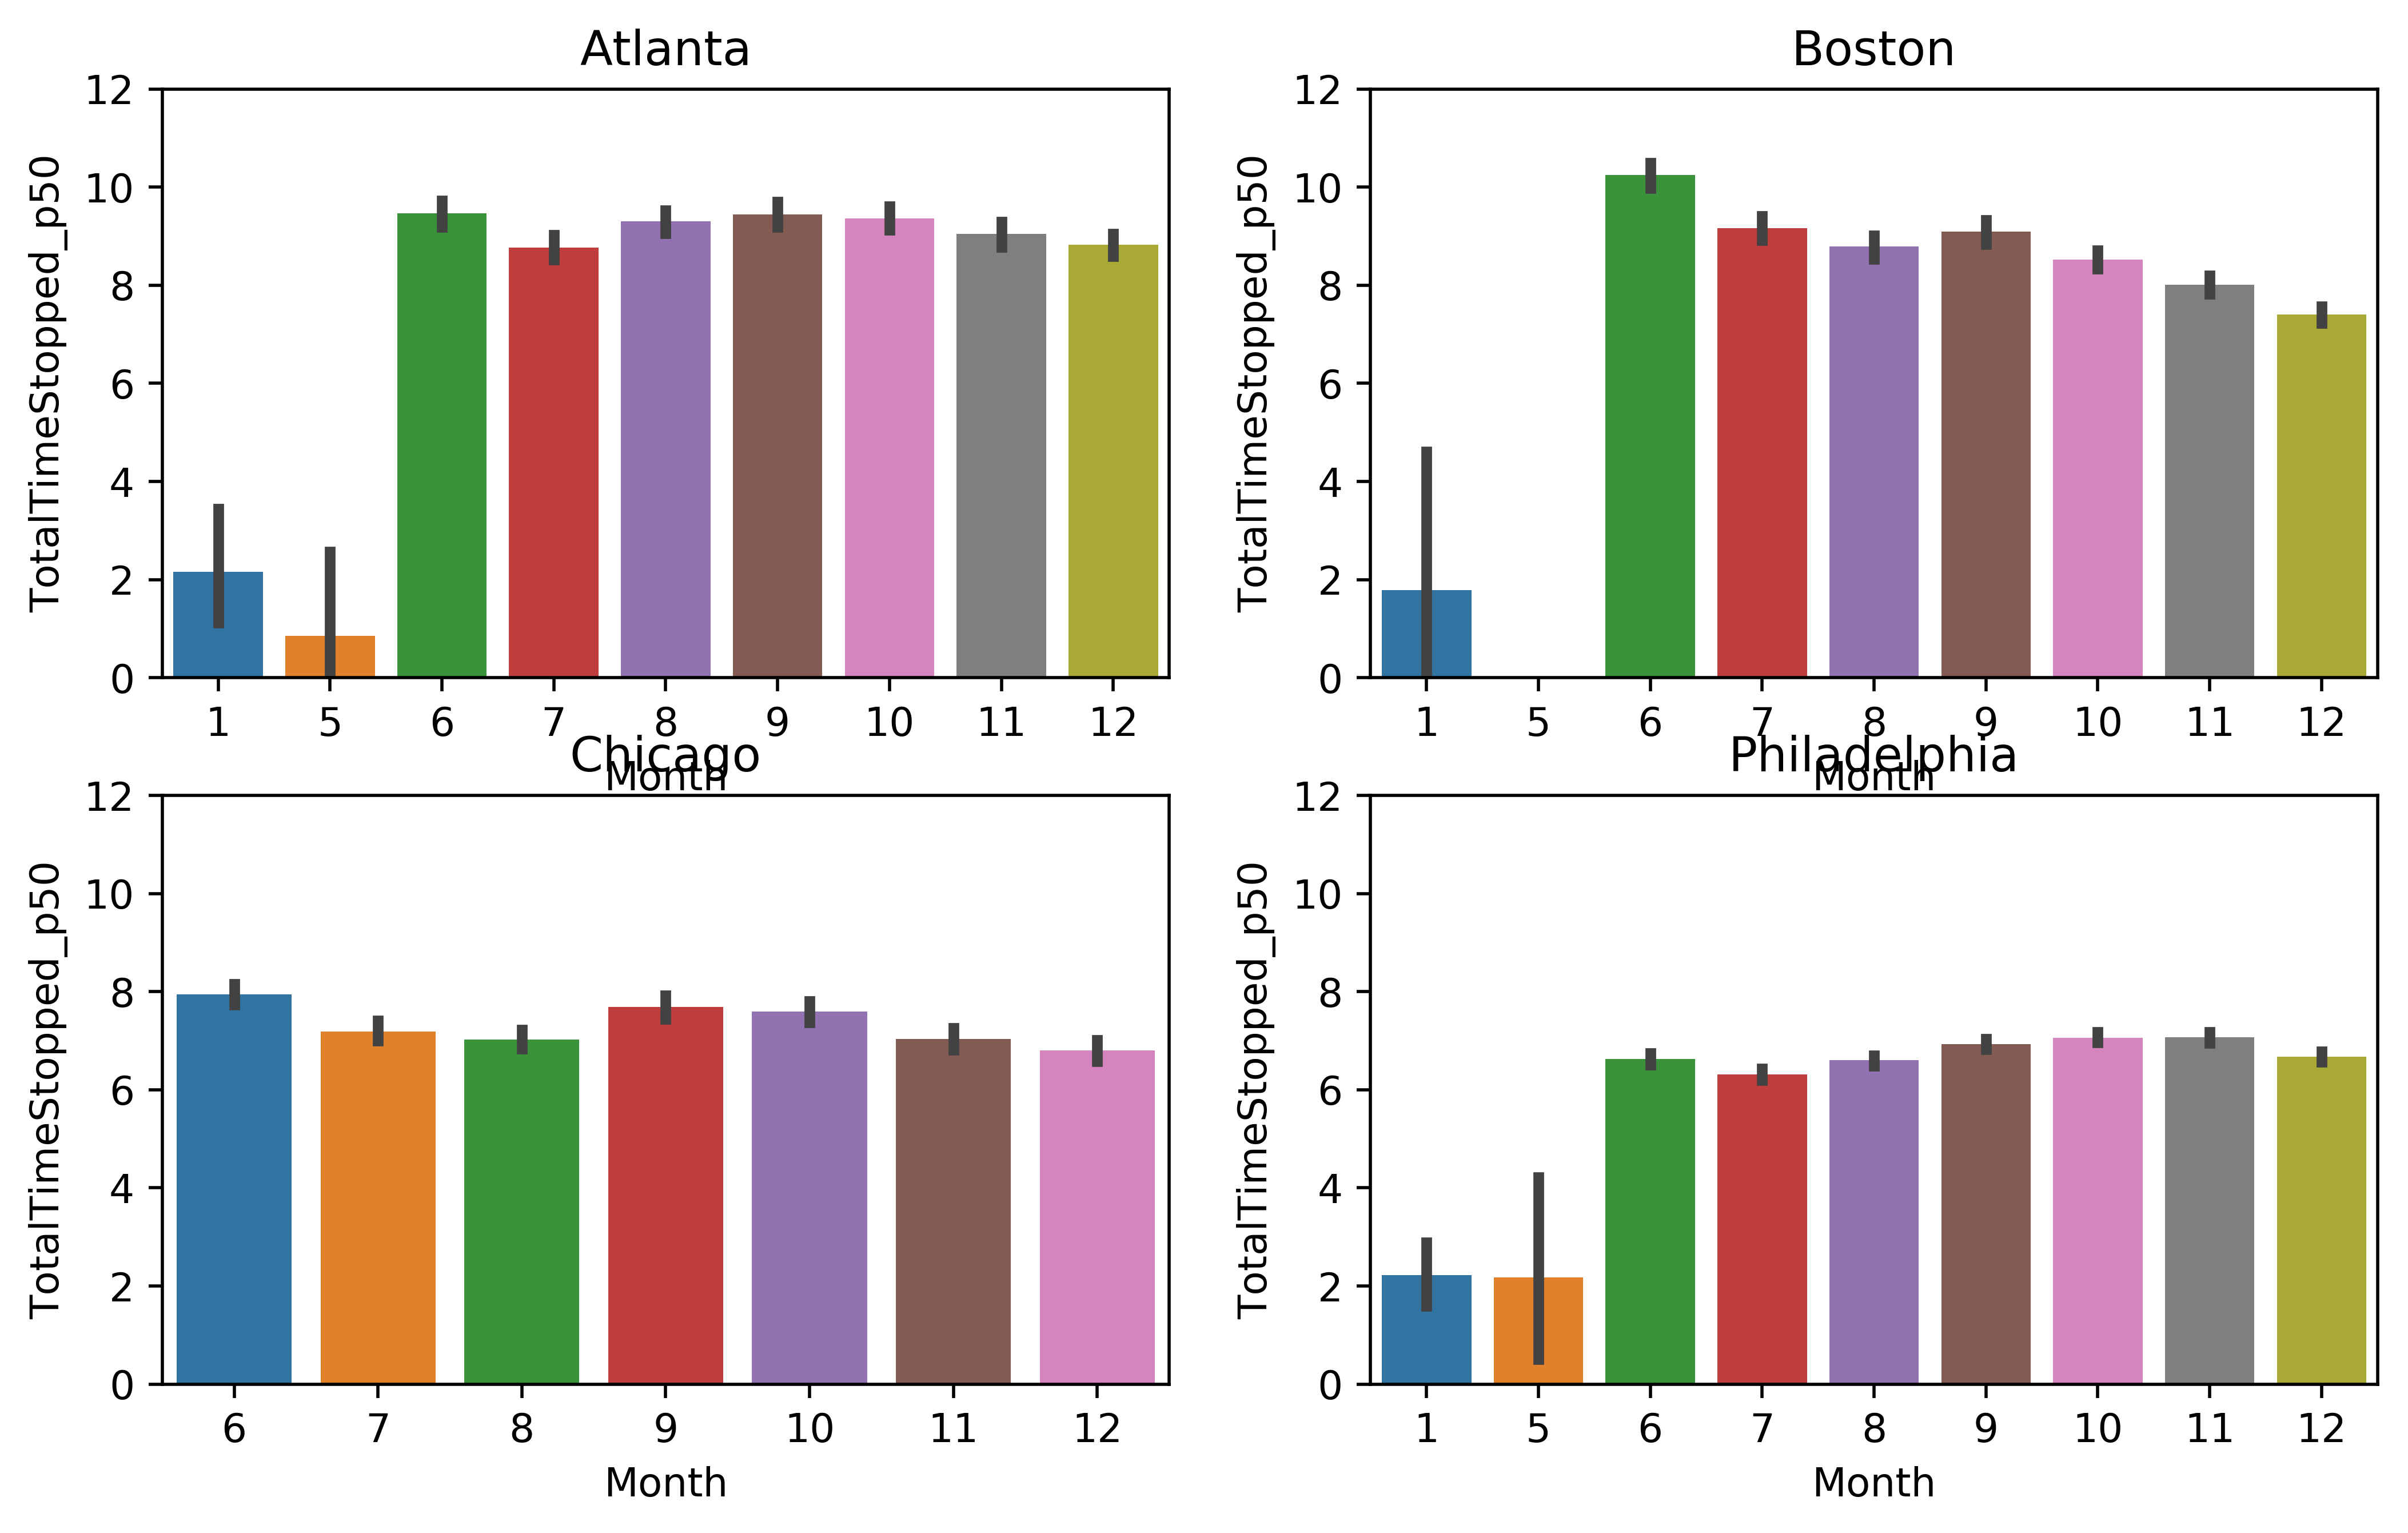

In [29]:
fig, axes = plt.subplots(2,2, figsize=[10,6])

sns.barplot(data=train_df[train_df['City']=='Atlanta'], y='TotalTimeStopped_p50', x='Month', ax=axes[0,0],);
sns.barplot(data=train_df[train_df['City']=='Boston'], y='TotalTimeStopped_p50', x='Month', ax=axes[0,1],);
sns.barplot(data=train_df[train_df['City']=='Chicago'], y='TotalTimeStopped_p50', x='Month', ax=axes[1,0],);
sns.barplot(data=train_df[train_df['City']=='Philadelphia'], y='TotalTimeStopped_p50', x='Month', ax=axes[1,1],);
axes[0,0].set_title("Atlanta");
axes[0,1].set_title("Boston");
axes[1,0].set_title("Chicago");
axes[1,1].set_title("Philadelphia");
axes[0,0].set_ylim([0,12]);
axes[0,1].set_ylim([0,12]);
axes[1,0].set_ylim([0,12]);
axes[1,1].set_ylim([0,12]);

fig.set_dpi(500)

Lack of monthly information is more likely due to the incompleteness of the data. So month is excluded from the features.

### Average median total time in week day

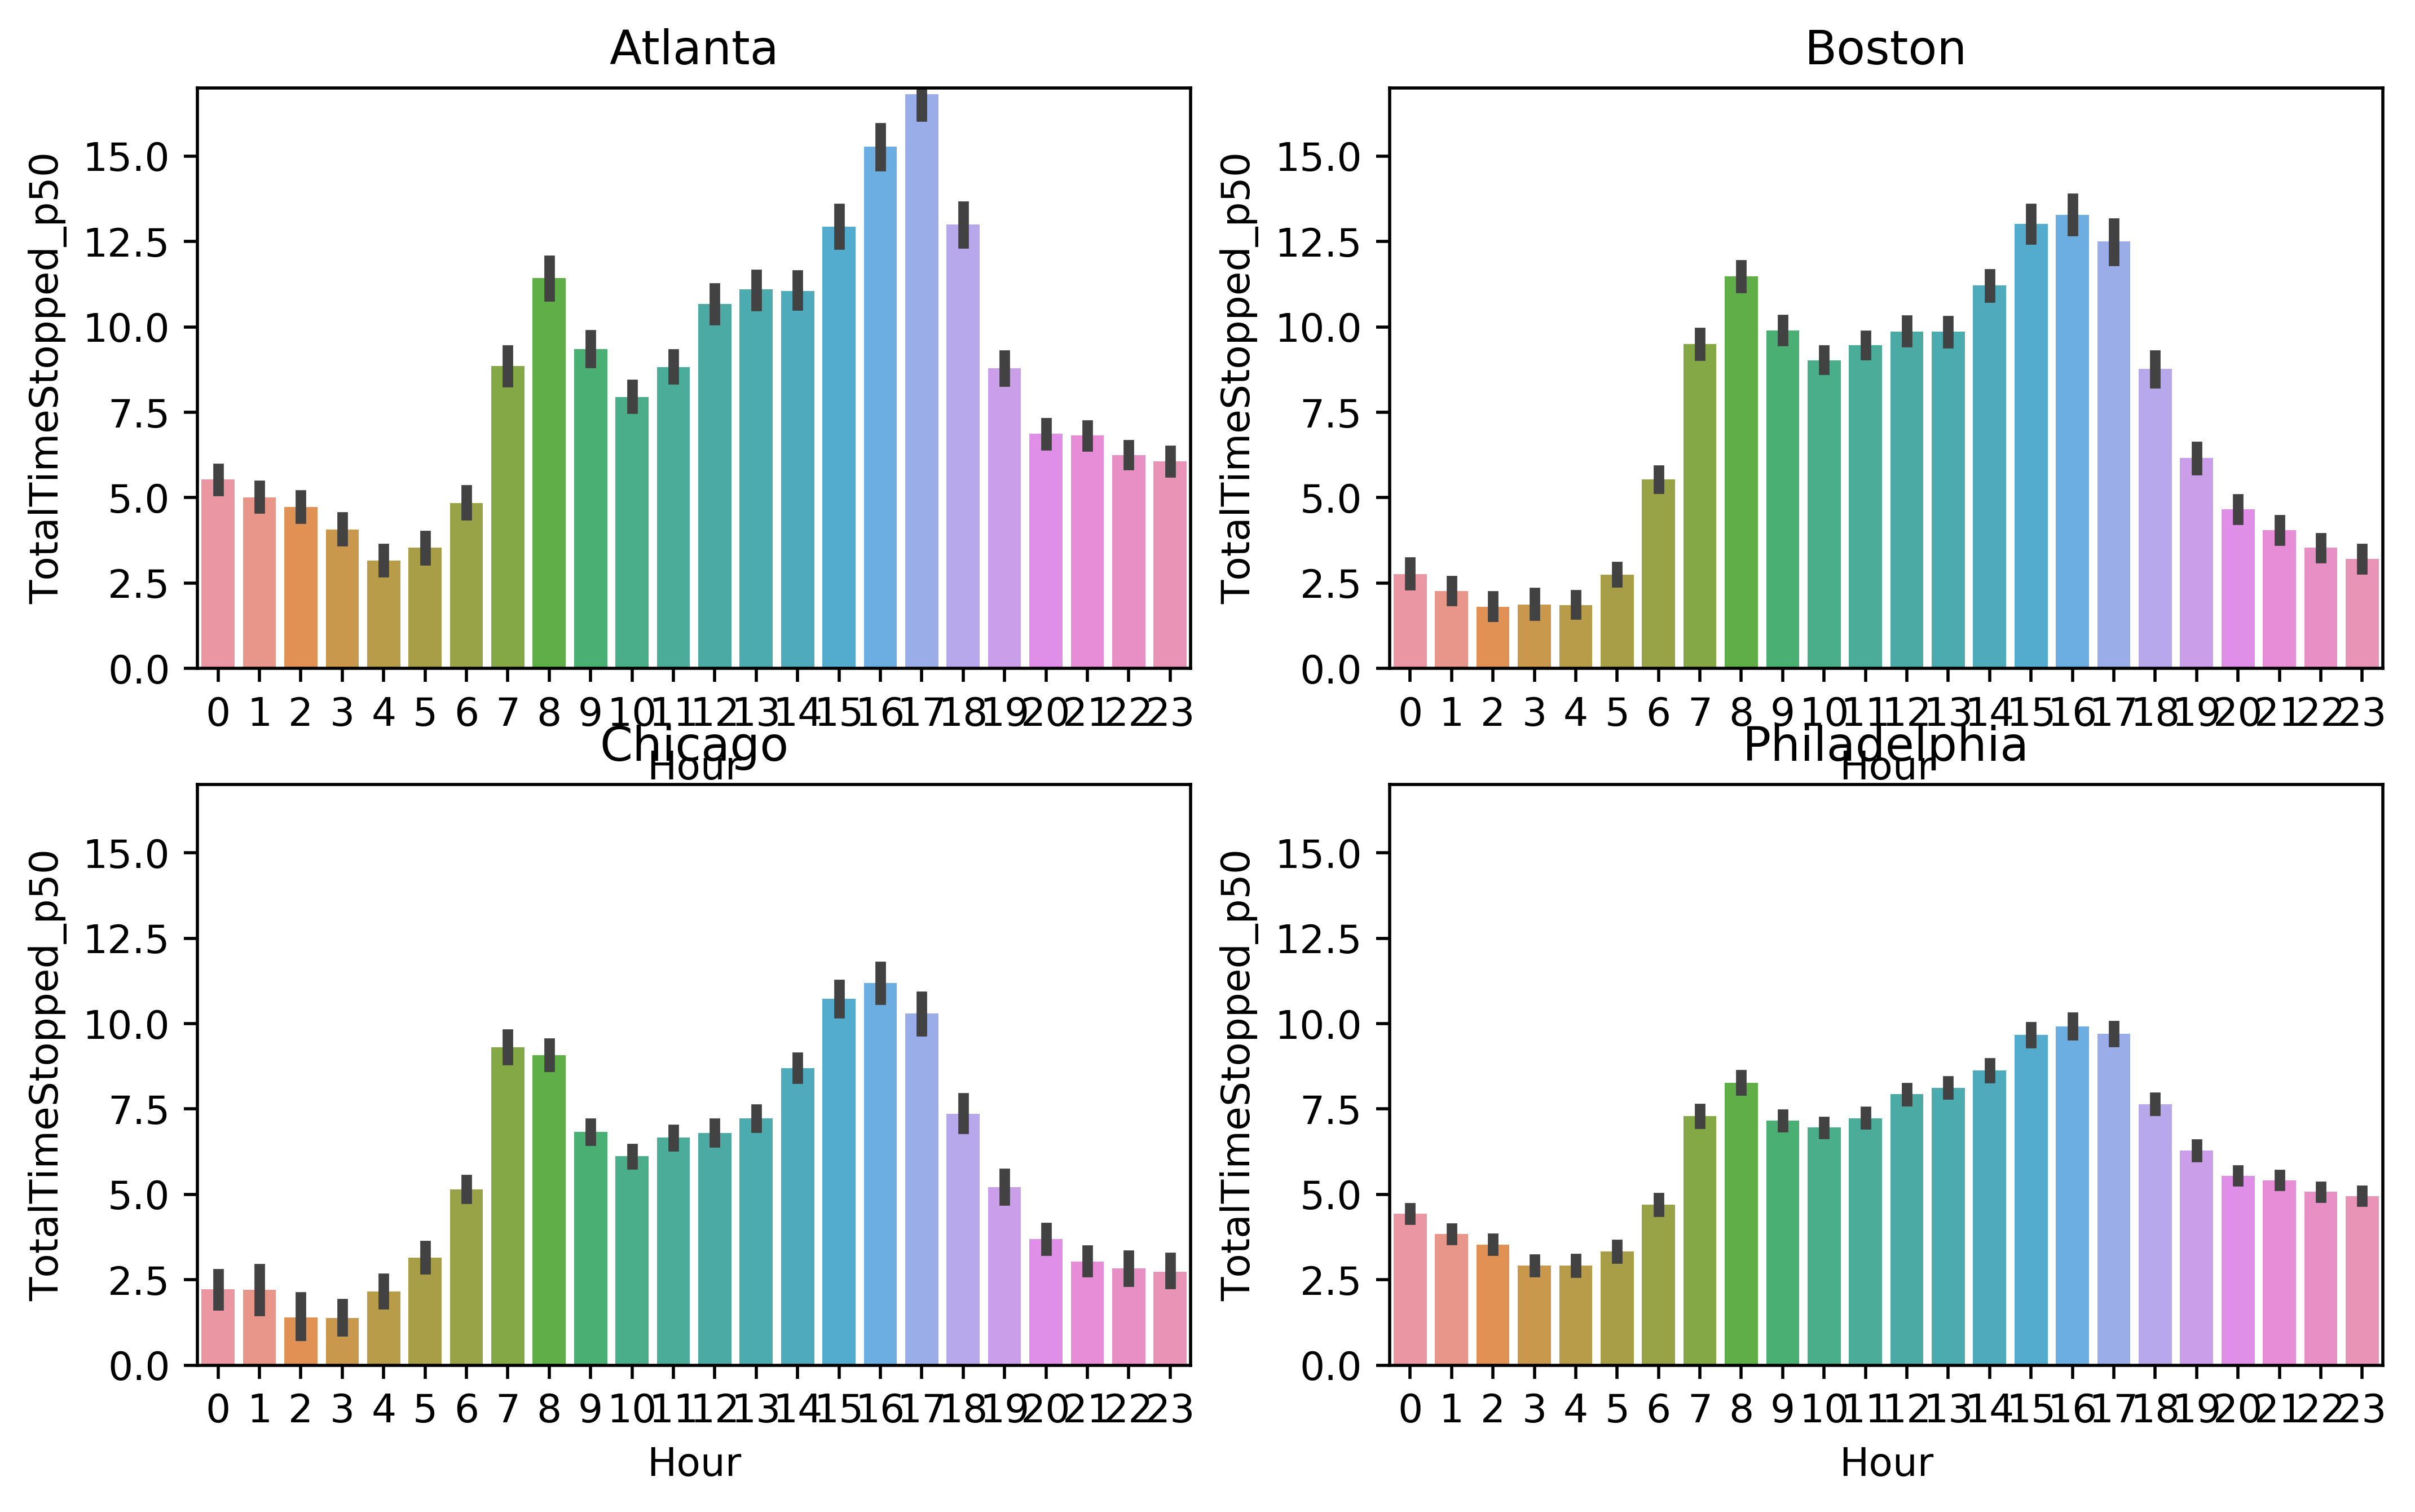

In [30]:
fig, axes = plt.subplots(2,2, figsize=[10,6])

sns.barplot(data=train_df[train_df['City']=='Atlanta'], y='TotalTimeStopped_p50', x='Hour', ax=axes[0,0],);
sns.barplot(data=train_df[train_df['City']=='Boston'], y='TotalTimeStopped_p50', x='Hour', ax=axes[0,1],);
sns.barplot(data=train_df[train_df['City']=='Chicago'], y='TotalTimeStopped_p50', x='Hour', ax=axes[1,0],);
sns.barplot(data=train_df[train_df['City']=='Philadelphia'], y='TotalTimeStopped_p50', x='Hour', ax=axes[1,1],);
axes[0,0].set_title("Atlanta");
axes[0,1].set_title("Boston");
axes[1,0].set_title("Chicago");
axes[1,1].set_title("Philadelphia");
axes[0,0].set_ylim([0,17]);
axes[0,1].set_ylim([0,17]);
axes[1,0].set_ylim([0,17]);
axes[1,1].set_ylim([0,17]);

fig.set_dpi(500)

We can encode the time day time into:
- 7-9am: Rush
- 10-14: Day
- 15-18: Rush
- 19- 23 : Night
- 0-6: Night 

In [31]:
daytime_encode = {
    0:'Night',
    1:'Night',
    2:'Night',
    3:'Night',
    4:'Night',
    5:'Night',
    6:'Night',
    7:'Rush',
    8:'Rush',
    9:'Rush',
    10:'Day',
    11:'Day',
    12:'Day',
    13:'Day',
    14:'Day',
    15:'Rush',
    16:'Rush',
    17:'Rush',
    18:'Rush',
    19:'Night',
    20:'Night',
    21:'Night',
    22:'Night',
    23:'Night',
}

In [32]:
train_df['Hour']=train_df['Hour'].map(daytime_encode)
test_df['Hour']=test_df['Hour'].map(daytime_encode)

In [33]:
train_df.head()

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Distance
0,2.0,2.0,1.75,1.75,Night,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
1,2.0,2.0,0.75,0.75,Night,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
2,2.0,2.0,1.75,1.75,Night,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
3,2.0,2.0,0.75,0.75,Night,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
4,2.0,2.0,1.75,1.75,Night,0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491


In [34]:
train_df=train_df.drop(['Month'],axis=1)
test_df=test_df.drop(['Month'],axis=1)

train_df.head()

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Distance
0,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
1,2.0,2.0,0.75,0.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
2,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
3,2.0,2.0,0.75,0.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491
4,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,6864.378491


### Congestion time VS distance to the city centre

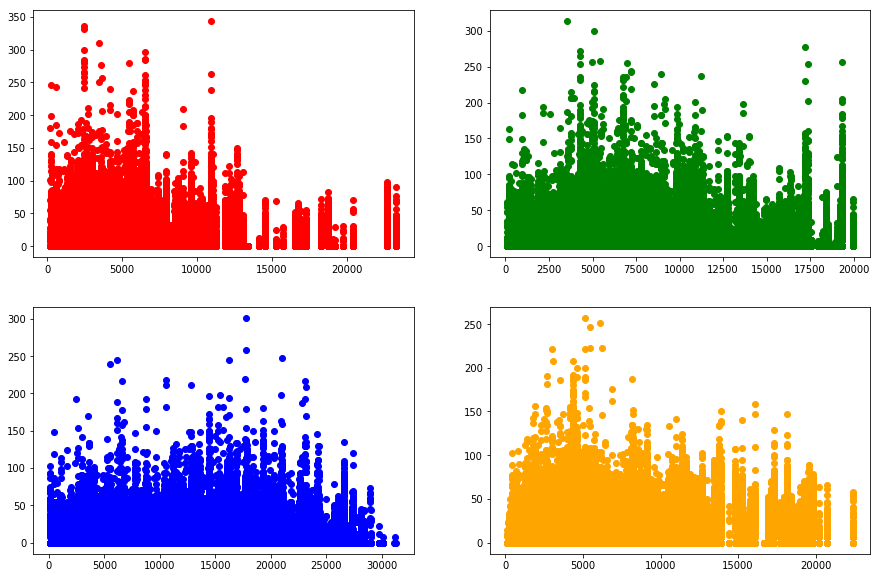

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

axs[0,0].scatter(x=train_df.loc[train_df['City']=='Atlanta','Distance'],\
              y=train_df.loc[train_df['City']=='Atlanta','TotalTimeStopped_p50'],\
              color='red')
axs[0,1].scatter(x=train_df.loc[train_df['City']=='Boston','Distance'],\
              y=train_df.loc[train_df['City']=='Boston','TotalTimeStopped_p50'],\
              color='green')
axs[1,0].scatter(x=train_df.loc[train_df['City']=='Chicago','Distance'],\
              y=train_df.loc[train_df['City']=='Chicago','TotalTimeStopped_p50'],\
              color='blue')
axs[1,1].scatter(x=train_df.loc[train_df['City']=='Philadelphia','Distance'],\
              y=train_df.loc[train_df['City']=='Philadelphia','TotalTimeStopped_p50'],\
              color='orange')


## min-max standardization of distance

In [36]:
train_df['Distance']=train_df.groupby(['City'])['Distance'].transform(lambda x:(x-min(x))/(max(x)-min(x)))
test_df['Distance']=test_df.groupby(['City'])['Distance'].transform(lambda x:(x-min(x))/(max(x)-min(x)))

In [37]:
train_df.head()

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,DriveDirection,Distance
0,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.287816
1,2.0,2.0,0.75,0.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.287816
2,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.287816
3,2.0,2.0,0.75,0.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.287816
4,2.0,2.0,1.75,1.75,Night,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0.0,0.287816


## One hot encoding of categorical features i.e. 'Hour' and 'City'

It looks relationship between congestion and distance to centre differs among cities. So distance will be scaled among each city.

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 19 columns):
EntryStreetName            857409 non-null float64
ExitStreetName             857409 non-null float64
EntryHeading               857409 non-null float64
ExitHeading                857409 non-null float64
Hour                       857409 non-null object
Weekend                    857409 non-null int64
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
DistanceToFirstStop_p20    857409 non-null float64
DistanceToFirstStop_p40    857409 non-null float64
DistanceToFirstStop_p50    857409 non-null float64
DistanceToFirstStop_p60    857409 non-null float64
DistanceToFirstStop_p80    857409 non-null float64
City                       857409 non-null object
DriveDirection             857409 no

In [39]:
categorical_train_df = pd.get_dummies(train_df[['Hour','City']], drop_first=False)
categorical_test_df = pd.get_dummies(test_df[['Hour','City']], drop_first=False)

categorical_train_df.head()

,Hour_Day,Hour_Night,Hour_Rush,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia
0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0


In [40]:
train_df=train_df.drop(['Hour','City'],axis=1)
train_df=pd.concat([train_df,categorical_train_df],axis=1)

test_df=test_df.drop(['Hour','City'],axis=1)
test_df=pd.concat([test_df,categorical_test_df],axis=1)

In [41]:
train_df.head()

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Weekend,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,...,DistanceToFirstStop_p80,DriveDirection,Distance,Hour_Day,Hour_Night,Hour_Rush,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia
0,2.0,2.0,1.75,1.75,0,0,0,0,0,0,...,0.0,0.0,0.287816,0,1,0,1,0,0,0
1,2.0,2.0,0.75,0.75,0,0,0,0,0,0,...,0.0,0.0,0.287816,0,1,0,1,0,0,0
2,2.0,2.0,1.75,1.75,0,0,0,0,0,0,...,0.0,0.0,0.287816,0,1,0,1,0,0,0
3,2.0,2.0,0.75,0.75,0,0,0,0,0,0,...,0.0,0.0,0.287816,0,1,0,1,0,0,0
4,2.0,2.0,1.75,1.75,0,0,0,0,0,0,...,0.0,0.0,0.287816,0,1,0,1,0,0,0


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 24 columns):
EntryStreetName            857409 non-null float64
ExitStreetName             857409 non-null float64
EntryHeading               857409 non-null float64
ExitHeading                857409 non-null float64
Weekend                    857409 non-null int64
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
DistanceToFirstStop_p20    857409 non-null float64
DistanceToFirstStop_p40    857409 non-null float64
DistanceToFirstStop_p50    857409 non-null float64
DistanceToFirstStop_p60    857409 non-null float64
DistanceToFirstStop_p80    857409 non-null float64
DriveDirection             857409 non-null float64
Distance                   857409 non-null float64
Hour_Day                   857409 

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

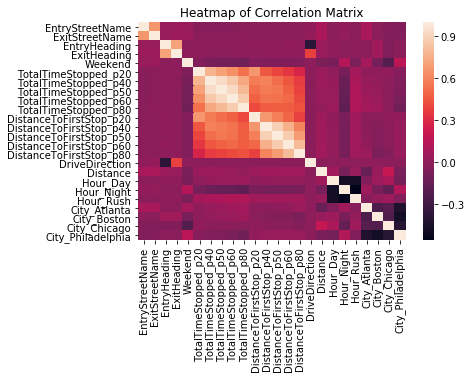

In [43]:
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

## Now we are all set for modelling

In [44]:
train_df.to_csv('/Users/jimmyding/GEOTAB_intersection_congestion/dataset/bigquery-geotab-intersection-congestion/train_final.csv')
test_df.to_csv('/Users/jimmyding/GEOTAB_intersection_congestion/dataset/bigquery-geotab-intersection-congestion/test_final.csv')
